# Tugas Hands-on Pemrosesan Audio

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Naufal Haris Nurkhoirulloh
**NIM:** 122140040

Referensi Chat dengan AI : 

---

## Deskripsi Tugas

 Tugas ini dirancang untuk menguji pemahaman mahasiswa terhadap konsep-konsep fun
damental dalam pemrosesan audio digital, termasuk manipulasi sinyal audio, filtering,
 pitch shifting, normalisasi, dan teknik remix audio. Mahasiswa diharapkan dapat men
erapkan teori yang telah dipelajari dalam praktik langsung menggunakan Python dan
 pustaka pemrosesan audio.

---

### Soal 1: Rekaman dan Analisis Suara Multi-Level

#### Import Library

In [2]:
# Import Library (Satu-satunya sel kode dalam template ini)
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from PIL import Image
import cv2
from IPython.display import Audio, HTML, display
import os

# Set matplotlib untuk menampilkan plot inline
%matplotlib inline

# Tampilkan versi library untuk dokumentasi
print("Library versions:")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {plt.matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"OpenCV: {cv2.__version__}")

# Tambahkan import lain jika diperlukan saat mengerjakan tugas

Library versions:
NumPy: 2.2.5
Matplotlib: 3.10.6
Librosa: 0.11.0
OpenCV: 4.10.0


#### Load data audio1 dan exploration
untuk lihat audio saya dan informasi apa aja yang terdapat pada audio saya

In [3]:
# Muat file audio dan tampilkan metadata dasar
audio_path = os.path.join('audio', 'audio1.wav')

# Membaca audio (y: array amplitudo, sr: sample rate)
y, sr = librosa.load(audio_path, sr=None, mono=False)  # mono=False agar bisa deteksi jumlah kanal

# Jika y 1D: mono, jika 2D: stereo/multi-channel
if y.ndim == 1:
  num_channels = 1
  channel_info = 'Mono'
  total_samples = y.shape[0]
else:
  num_channels = y.shape[0]
  channel_info = f'Stereo ({num_channels} channels)' if num_channels == 2 else f'{num_channels} channels'
  total_samples = y.shape[1]

duration_sec = total_samples / sr

print(f"Path file      : {audio_path}")
print(f"Sample rate    : {sr} Hz")
print(f"Durasi         : {duration_sec:.2f} detik")
print(f"Jumlah kanal   : {channel_info}")
print(f"Total sampel   : {total_samples}")

Path file      : audio\audio1.wav
Sample rate    : 44100 Hz
Durasi         : 25.07 detik
Jumlah kanal   : Mono
Total sampel   : 1105448


#### Visualisasi dengan Waveform dan Spectogram
Disini saya mau melihat dan menganalisis hasil dari visualisasi audio suara saya itu

C:\Users\Naufal Haris\AppData\Local\Temp\ipykernel_16432\3691184900.py:2: FutureWarning: waveshow() keyword argument 'x_axis' has been renamed to 'axis' in version 0.10.0.
	This alias will be removed in version 1.0.
  librosa.display.waveshow(y, sr=sr, color='blue', x_axis='time')


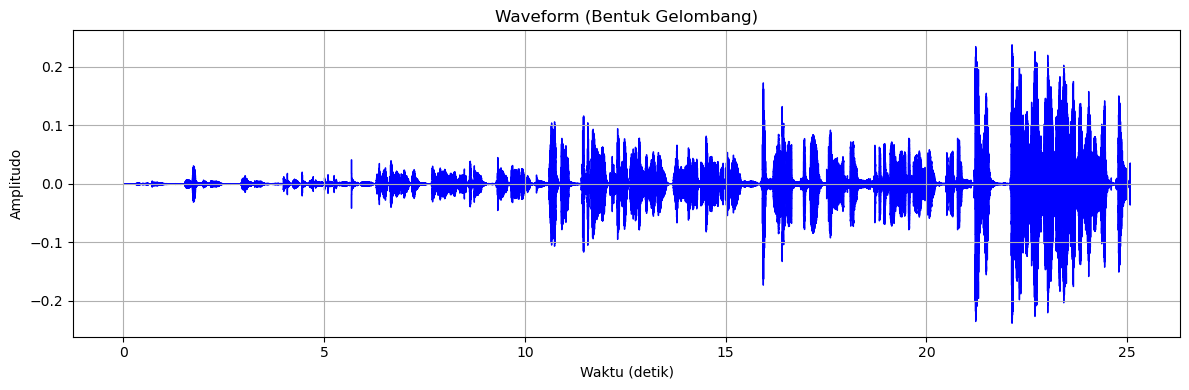

In [9]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, color='blue', x_axis='time')
plt.title('Waveform (Bentuk Gelombang)')
plt.xlabel('Waktu (detik)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.tight_layout()
plt.show()


##### Analisis Waveform
Berdasarkan hasil visualisasi diatas kita bisa lihat gelombangnya semakin naik per 5 detik ya

- Mulai dari detik 0-5 gelombangnya terlihat sangat kecil yang berarti amplitudonya tidak keras/kecil sesuai intruksi saya record dengan suara berbisik atau rendah
- lalu detik 5-10 gelombang suaranya terlihat seperti suara orang berbicara normal, disitu amplitudonya terlihat stabil dan normal 
- selanjutnya detik 10-15 gelombangnya mulai naik yang menandakan suara dari audionya keras
- di detik 15-20 terlihat gelombangnya melenting tinggi yang menandakan mungkin sumber suaranya tinggi atau nyaring seperti instruksi suara cempreng yang dibuat
- terakhir detik 20-25 gelombangnya terlihat ramai dan menjulang tinggi yang berarti amplitudonya sangat keras sesuai dengan instruksi soal dimana suara saya disitu sedang teriak 

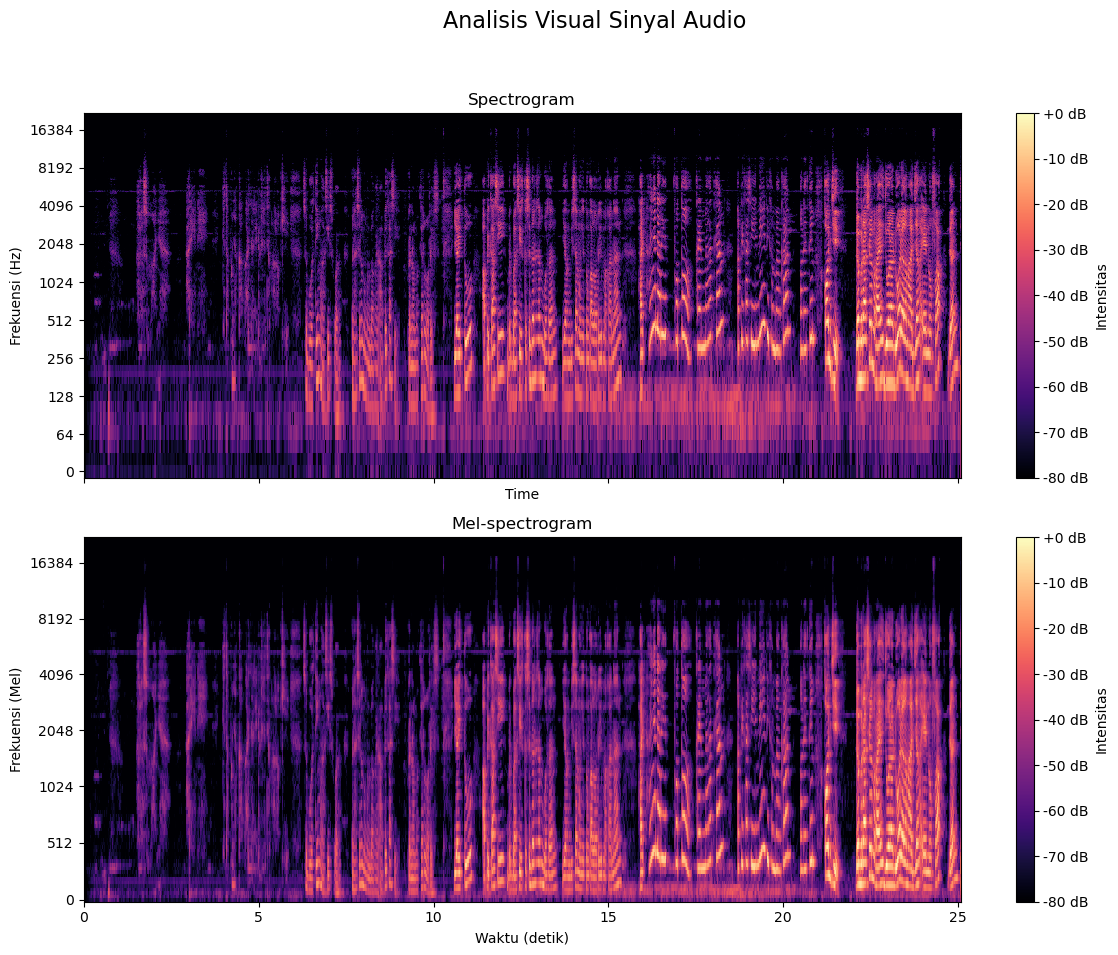

In [17]:
# 3. Membuat Visualisasi
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 10))
fig.suptitle('Analisis Visual Sinyal Audio', fontsize=16)

# b. Menampilkan Spectrogram
# Lakukan Short-Time Fourier Transform (STFT)
D = librosa.stft(y)
# Konversi amplitudo ke desibel (dB)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
img_spec = librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', ax=ax[0])
ax[0].set_title('Spectrogram')
ax[0].set_ylabel('Frekuensi (Hz)')
fig.colorbar(img_spec, ax=ax[0], format='%+2.0f dB', label='Intensitas')


# c. Menampilkan Mel-spectrogram
# Hitung Mel-spectrogram
M = librosa.feature.melspectrogram(y=y, sr=sr)
# Konversi ke desibel (dB)
M_db = librosa.power_to_db(M, ref=np.max)
img_mel = librosa.display.specshow(M_db, sr=sr, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set_title('Mel-spectrogram')
ax[1].set_xlabel('Waktu (detik)')
ax[1].set_ylabel('Frekuensi (Mel)')
fig.colorbar(img_mel, ax=ax[1], format='%+2.0f dB', label='Intensitas')


# Merapikan layout dan menampilkan plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### Analisis spectogram 

pada spectogram ada domain waktu, frekuensi, dan amplitudo. waktu ada di axis x, frekuensi di axis y, dan amplitudo itu warna kuning cerah.

- pada detik 0-5 terlihat warnanya nyaris gelap(hitam) dengan ada sedikit warna ungu artinya energi suaranya sangat rendah atau kecil dan frekuensi suaranya terlihat jarang.
- lanjut detik 5-10 warnanya terlihat mulai rapat dan ada sedikit warna kuning yang tidak begitu terang berarti energi suaranya normal seperti sedang berbicara seperti biasa.
- detik 10-15 warna ungunya terlihat rapat sepertinya frekuensi suaranya stabil dengan banyak variasi warna kuning yang berarti energi dari sumber suaranya lumayan keras.
- di detik 15-20 energi di frekuensi bawah mungkin terlihat sedikit lebih lemah dibanding suara di "detik 10-15" namun pita energi warna kuning itu terlihat sangat terang hingga mencapai 2048 hz. 
- detik 20-25 hampir didominasi oleh pita energi warna kuning yang sangat terang menjulang tinggi hingga mencapai 4096 hz

#### Resampling

In [36]:
import librosa
import soundfile as sf # Pustaka untuk menyimpan file audio
# Muat file audio dan tampilkan metadata dasar
audio_path = os.path.join('audio', 'audio1.wav')

# Membaca audio (y: array amplitudo, sr: sample rate)
y_original, sr_original = librosa.load(audio_path, sr=None, mono=False)  # mono=False agar bisa deteksi jumlah kanal

print(f"Audio Asli sebelum resampling:")
print(f"Laju Sampel Asli: {sr_original} Hz")
print(f"Durasi Asli: {librosa.get_duration(y=y_original, sr=sr_original):.2f} detik")

# melakukan down sampling ke kualitas telepon

# Downsample ke kualitas telepon (8,000 Hz)
y_telepon, sr_telepon = librosa.load(audio_path, sr=8000)

print("\nAudio setelah Resampling:")
print(f"Laju Sampel Telepon: {sr_telepon} Hz")

print(f"\n--- Analisis Durasi ---")
print(f"Durasi Asli (di {sr_original} Hz): {librosa.get_duration(y=y_original, sr=sr_original):.2f} detik")
print(f"Durasi Telepon (di {sr_telepon} Hz): {librosa.get_duration(y=y_telepon, sr=sr_telepon):.2f} detik")



Audio Asli sebelum resampling:
Laju Sampel Asli: 44100 Hz
Durasi Asli: 25.07 detik

Audio setelah Resampling:
Laju Sampel Telepon: 8000 Hz

--- Analisis Durasi ---
Durasi Asli (di 44100 Hz): 25.07 detik
Durasi Telepon (di 8000 Hz): 25.07 detik


#### memvisualisasikan hasil sampling

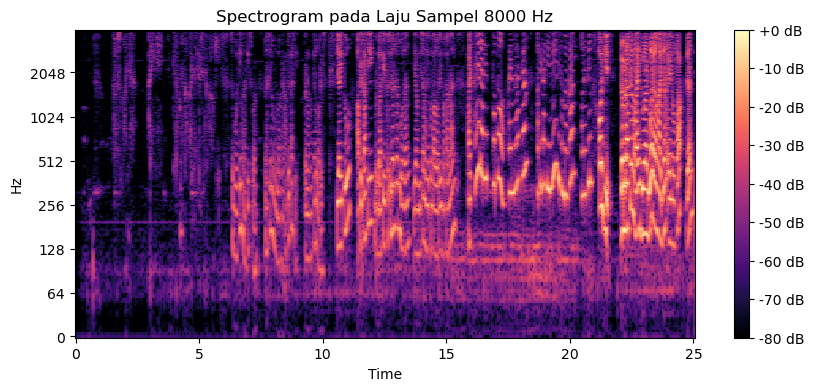

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Buat spectrogram untuk audio kualitas telepon
D_telepon = librosa.stft(y_telepon)
S_db_telepon = librosa.amplitude_to_db(np.abs(D_telepon), ref=np.max)

# Tampilkan
fig, ax = plt.subplots(figsize=(10, 4))
img = librosa.display.specshow(S_db_telepon, sr=sr_telepon, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set_title(f'Spectrogram pada Laju Sampel {sr_telepon} Hz')
plt.show()

##### Analisis perbandingan hasil sampling dengan suara asli

pertama dari segi durasi baik audio asli dengan audio hasil resampling durasinya tetap di 25.07 detik. Berdasarkan percakapan saya dengan gemini hal ini karena librosa secara cerdas melakukan interpolasi data untuk mempertahankan durasi audio yang sama meskipun jumlah sampelnya berubah.

kemudian dari kualitas audio dapat terlihat pada hasil resampling kalau pada suara cempreng dan suara teriak itu seperti dipotong bagian atasny (clipping) yang membuat suaranya menjadi kehilangan ketajaman, dan mungkin kehilangan beberapa informasi suara.

In [35]:
# Simpan file audio yang sudah di-resample
sf.write('audio_radio_22050Hz.wav', y_radio, sr_radio)
sf.write('audio_telepon_8000Hz.wav', y_telepon, sr_telepon)

print("\nFile audio yang telah di-resample berhasil disimpan!")


File audio yang telah di-resample berhasil disimpan!


### Soal 2: Noise Reduction dengan Filtering

In [37]:
# Muat file audio dan tampilkan metadata dasar
audio_path2 = os.path.join('audio', 'audio2.wav')

# Membaca audio (y: array amplitudo, sr: sample rate)
y, sr = librosa.load(audio_path2, sr=None, mono=False)  # mono=False agar bisa deteksi jumlah kanal

# Jika y 1D: mono, jika 2D: stereo/multi-channel
if y.ndim == 1:
  num_channels = 1
  channel_info = 'Mono'
  total_samples = y.shape[0]
else:
  num_channels = y.shape[0]
  channel_info = f'Stereo ({num_channels} channels)' if num_channels == 2 else f'{num_channels} channels'
  total_samples = y.shape[1]

duration_sec = total_samples / sr

print(f"Path file      : {audio_path2}")
print(f"Sample rate    : {sr} Hz")
print(f"Durasi         : {duration_sec:.2f} detik")
print(f"Jumlah kanal   : {channel_info}")
print(f"Total sampel   : {total_samples}")

# --- Parameter Filter ---
# Kita akan memotong semua frekuensi di bawah 100 Hz
low_cut_freq = 100
# Kita akan memotong semua frekuensi di atas 3000 Hz
high_cut_freq = 3000
# Orde filter (semakin tinggi, semakin tajam potongannya)
order = 5

Path file      : audio\audio2.wav
Sample rate    : 44100 Hz
Durasi         : 8.08 detik
Jumlah kanal   : Mono
Total sampel   : 356352


In [38]:
def butter_highpass_filter(data, cutoff, sr, order=5):
    """Fungsi untuk menerapkan high-pass filter."""
    nyq = 0.5 * sr
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y_filtered = lfilter(b, a, data)
    return y_filtered

# Terapkan filter high-pass
y_hp = butter_highpass_filter(y, low_cut_freq, sr, order=order)

# Simpan hasilnya untuk didengarkan
sf.write('audio_highpass.wav', y_hp, sr)
print("Noise frekuensi rendah dihilangkan, hasilnya disimpan di 'audio_highpass.wav'")

NameError: name 'butter' is not defined